In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv')

# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print("Missing values:\n", missing_values)

# Drop rows where all columns are missing
df_cleaned = df.dropna(how='all')

# For partial missing values, fill numerical columns with median, categorical with mode
df_cleaned['bill_length_mm'].fillna(df_cleaned['bill_length_mm'].median(), inplace=True)
df_cleaned['bill_depth_mm'].fillna(df_cleaned['bill_depth_mm'].median(), inplace=True)
df_cleaned['flipper_length_mm'].fillna(df_cleaned['flipper_length_mm'].median(), inplace=True)
df_cleaned['body_mass_g'].fillna(df_cleaned['body_mass_g'].median(), inplace=True)
df_cleaned['sex'].fillna(df_cleaned['sex'].mode()[0], inplace=True)

# Ensure data types are correct (e.g., 'sex' should be categorical)
df_cleaned['sex'] = df_cleaned['sex'].astype('category')

# Display the cleaned data
print(df_cleaned.head())


Missing values:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            44.1           17.3              197.0   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3       4050.0    male  
4       3450.0  female  


In [2]:
# Filter the dataset for Gentoo penguins
gentoo_penguins = df_cleaned[df_cleaned['species'] == 'Gentoo']

# Calculate the average body mass
average_body_mass_gentoo = gentoo_penguins['body_mass_g'].mean()

print(f"The average body mass for Gentoo penguins is: {average_body_mass_gentoo} grams")


The average body mass for Gentoo penguins is: 5125.0 grams


In [4]:
from scipy.stats import skew, kurtosis

# Group by species and calculate skewness and kurtosis for bill_length_mm and bill_depth_mm
distribution_stats = df_cleaned.groupby('species').agg(
    bill_length_skew=('bill_length_mm', lambda x: skew(x, bias=False)),
    bill_length_kurtosis=('bill_length_mm', lambda x: kurtosis(x, bias=False)),
    bill_depth_skew=('bill_depth_mm', lambda x: skew(x, bias=False)),
    bill_depth_kurtosis=('bill_depth_mm', lambda x: kurtosis(x, bias=False))
)

print(distribution_stats)


           bill_length_skew  bill_length_kurtosis  bill_depth_skew  \
species                                                              
Adelie             0.168139             -0.191512         0.332861   
Chinstrap         -0.095318             -0.034605         0.006879   
Gentoo             0.729750              1.275911         0.350669   

           bill_depth_kurtosis  
species                         
Adelie               -0.058738  
Chinstrap            -0.874796  
Gentoo               -0.558725  


Number of outliers: 3


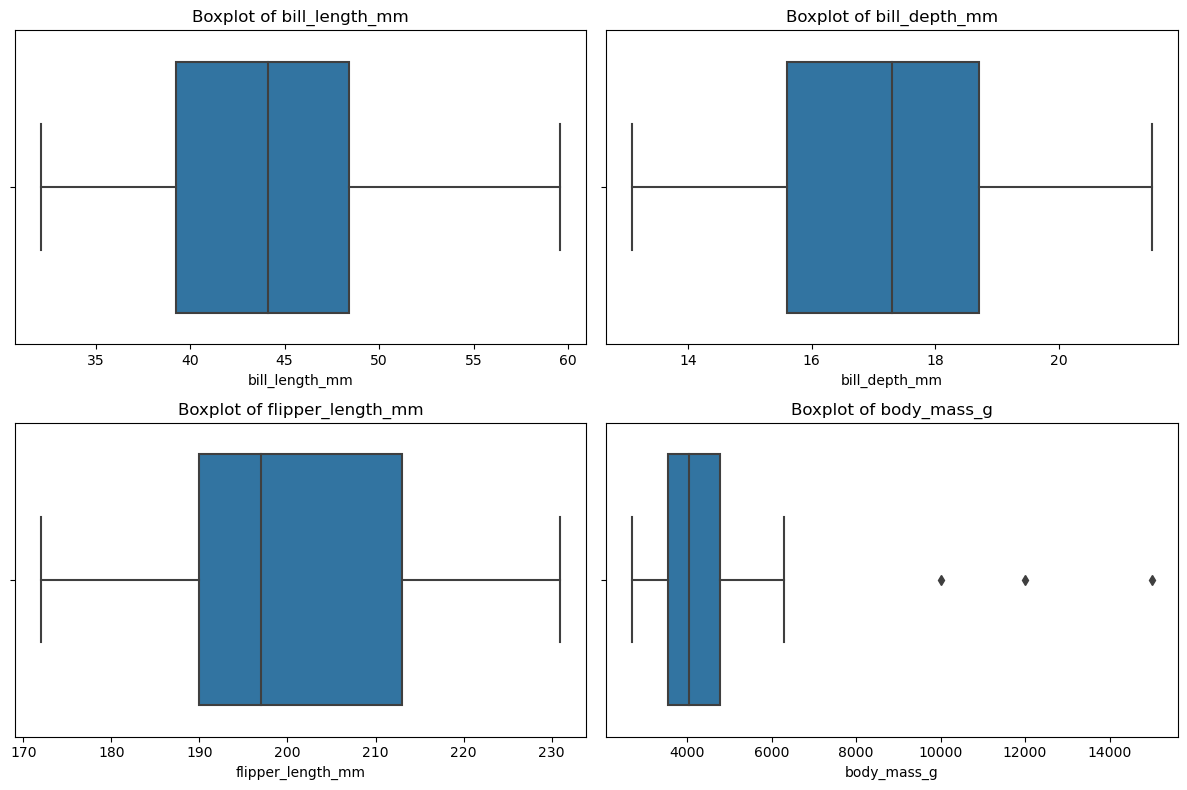

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate z-scores for each numerical column
from scipy.stats import zscore

df_cleaned_numeric = df_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Calculate the z-scores
z_scores = np.abs(zscore(df_cleaned_numeric))

# Set a threshold for identifying outliers (e.g., z-score > 3)
outliers = (z_scores > 3).any(axis=1)

# Get rows that are outliers
outliers_data = df_cleaned[outliers]

print(f"Number of outliers: {outliers_data.shape[0]}")

# Visualize using boxplots
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_cleaned_numeric.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_cleaned[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data before PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned_numeric)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Print explained variance to check how much dimensionality is reduced
explained_variance = pca.explained_variance_ratio_

print(f"Explained variance by components: {explained_variance}")


Explained variance by components: [0.61711071 0.19733481]


C:\Users\trsho\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\trsho\AppData\Local\Temp\ipykernel_8404\1057501116.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 5)
C:\Users\trsho\AppData\Local\Temp\ipykernel_8404\1057501116.py:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 6)
C:\Users\trsho\AppData\Local\Temp\ipykernel_8404\1057501116.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


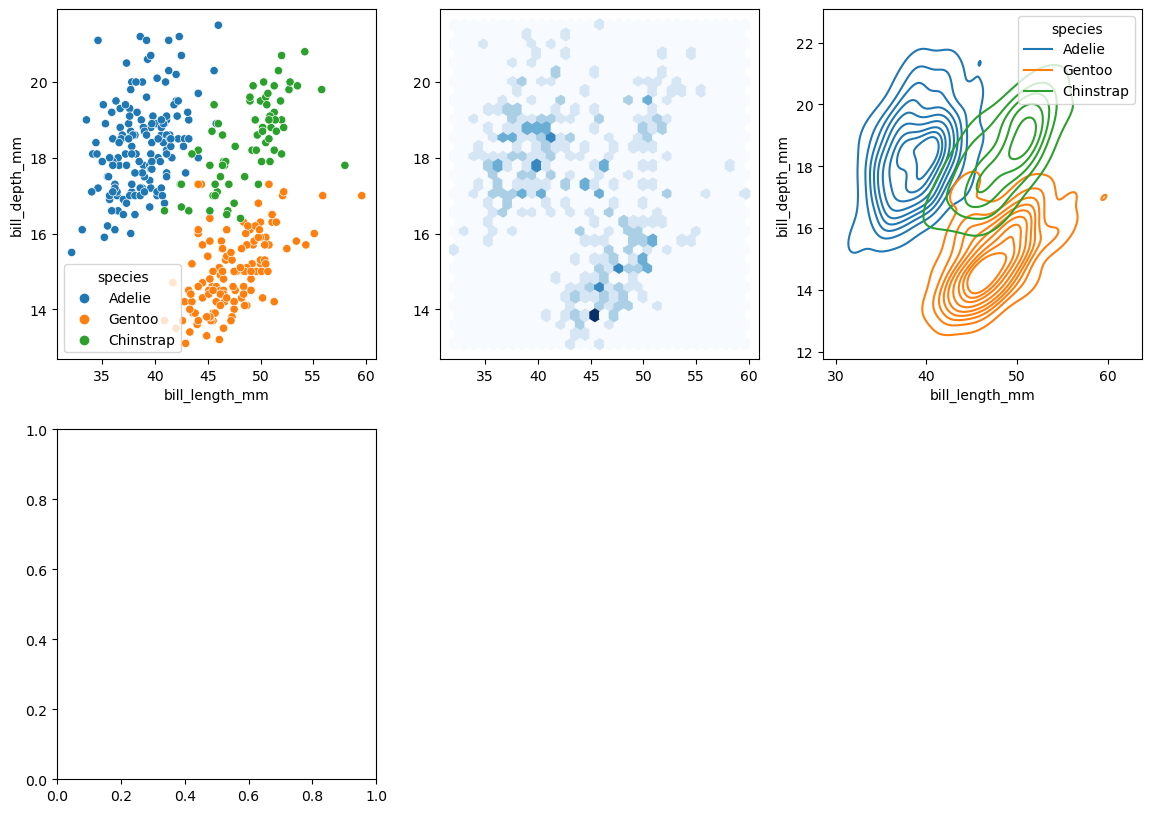

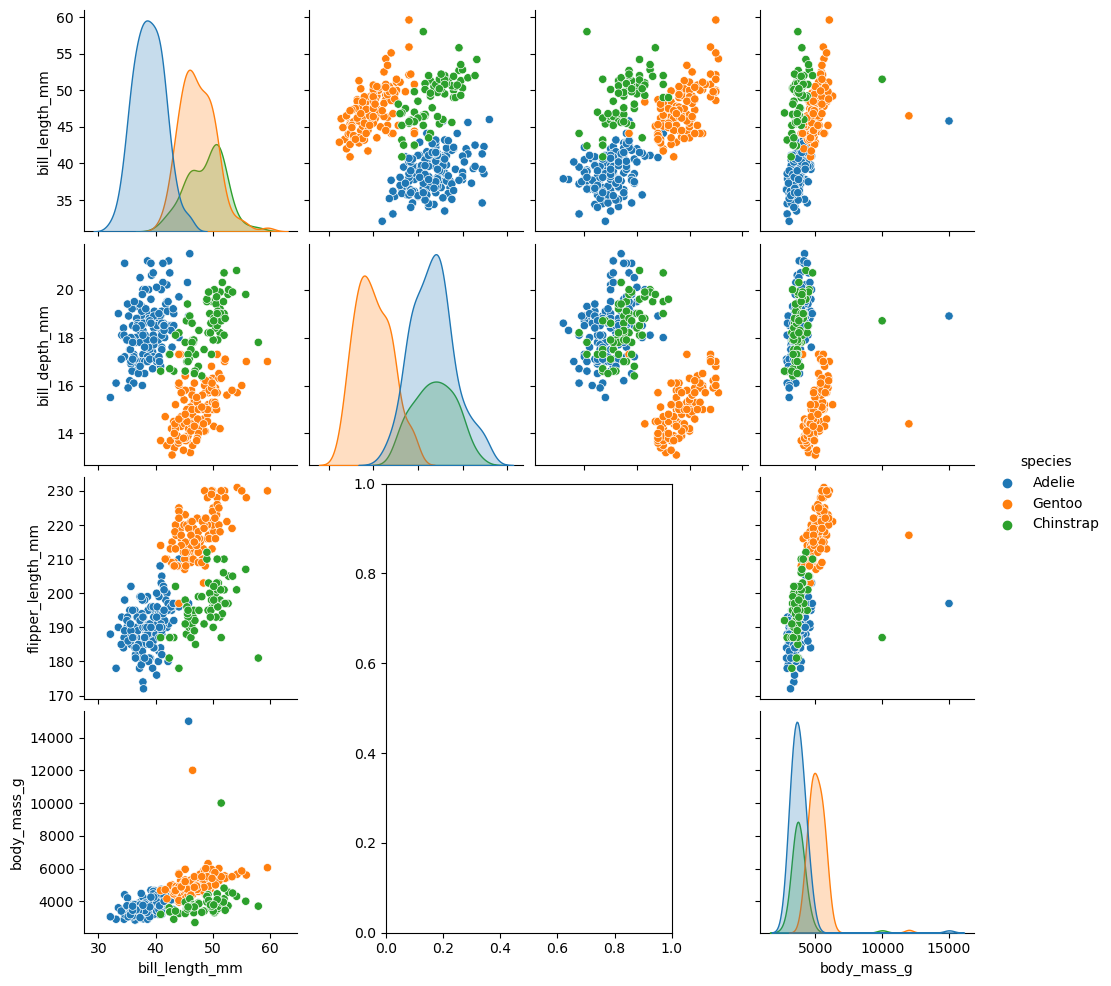

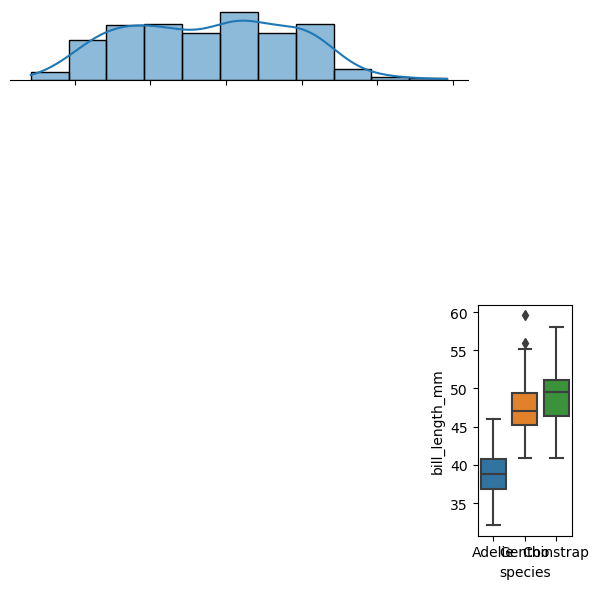

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 7 different visualizations
plt.figure(figsize=(14, 10))

# Scatterplot
plt.subplot(2, 3, 1)
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df_cleaned)

# Hexbin plot
plt.subplot(2, 3, 2)
plt.hexbin(df_cleaned['bill_length_mm'], df_cleaned['bill_depth_mm'], gridsize=30, cmap='Blues')

# KDE plot
plt.subplot(2, 3, 3)
sns.kdeplot(x='bill_length_mm', y='bill_depth_mm', data=df_cleaned, hue='species')

# Pairplot
plt.subplot(2, 3, 4)
sns.pairplot(df_cleaned, hue='species')

# Jointplot
plt.subplot(2, 3, 5)
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df_cleaned, kind='reg')

# Boxplot
plt.subplot(2, 3, 6)
sns.boxplot(x='species', y='bill_length_mm', data=df_cleaned)

plt.tight_layout()
plt.show()


In [8]:
# Group by species and island and find the maximum flipper length
max_flipper_length = df_cleaned.groupby(['species', 'island'])['flipper_length_mm'].max()

print(max_flipper_length)


species    island   
Adelie     Biscoe       203.0
           Dream        208.0
           Torgersen    210.0
Chinstrap  Dream        212.0
Gentoo     Biscoe       231.0
Name: flipper_length_mm, dtype: float64


In [9]:
# Apply z-score normalization to all numerical columns
df_normalized = df_cleaned.copy()
df_normalized[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(df_cleaned_numeric)

print(df_normalized.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.883054       0.787289          -1.420541   
1  Adelie  Torgersen       -0.809180       0.126114          -1.063485   
2  Adelie  Torgersen       -0.661432       0.431272          -0.420786   
3  Adelie  Torgersen        0.040373       0.075255          -0.277964   
4  Adelie  Torgersen       -1.326299       1.092447          -0.563608   

   body_mass_g     sex  
0    -0.468990    male  
1    -0.424125  female  
2    -0.917634  female  
3    -0.199803    male  
4    -0.738176  female  
